# Developing trading strat
- trend following
-potential trading signals

In [26]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [27]:
#using godl etf
gld = pdr.get_data_yahoo("GLD")
day = np.arange(1, len(gld)+1)
gld["day"] = day
gld.drop(columns=['Adj Close', "Volume"], inplace=True)
gld = gld.reindex(columns=['day'] + list(gld.columns[:-1]))
gld.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4597 entries, 2004-11-18 00:00:00-05:00 to 2023-02-23 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4597 non-null   int32  
 1   Open    4597 non-null   float64
 2   High    4597 non-null   float64
 3   Low     4597 non-null   float64
 4   Close   4597 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 197.5 KB


# Add and tranform data


### Add moving averages to the data frame

In [28]:
gld['9-day'] = gld["Close"].rolling(9).mean().shift()
gld['21-day'] = gld["Close"].rolling(21).mean().shift()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2004-12-16 00:00:00-05:00,20,43.990002,44.049999,43.580002,43.680000,44.284444,NaN
2004-12-17 00:00:00-05:00,21,43.930000,44.220001,43.779999,44.189999,44.071111,NaN
2004-12-20 00:00:00-05:00,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286
2004-12-21 00:00:00-05:00,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381
2004-12-22 00:00:00-05:00,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714
2004-12-23 00:00:00-05:00,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428


### Add signal


In [30]:
gld["signal"] = np.where(gld['9-day']>gld["21-day"], 1, 0)
gld["signal"] = np.where(gld['9-day']<gld["21-day"], -1, gld["signal"])
gld.dropna(inplace=True)
gld

,day,Open,High,Low,Close,9-day,21-day,return,signal
Date,,,,,,,,,
2004-12-20 00:00:00-05:00,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,0.003389,-1
2004-12-21 00:00:00-05:00,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-0.002710,-1
2004-12-22 00:00:00-05:00,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-0.004533,-1
2004-12-23 00:00:00-05:00,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,0.005663,-1
2004-12-27 00:00:00-05:00,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,0.004732,-1
...,...,...,...,...,...,...,...,...,...
2023-02-16 00:00:00-05:00,4593,170.339996,171.600006,169.960007,170.750000,173.115557,176.750000,-0.000820,-1
2023-02-17 00:00:00-05:00,4594,169.869995,171.470001,169.520004,171.259995,172.814445,176.448571,0.002982,-1
2023-02-21 00:00:00-05:00,4595,171.199997,171.500000,170.339996,170.619995,172.529999,176.037619,-0.003744,-1


### Calculate Istantaneuous return/system returns

In [31]:
gld["return"]= np.log(gld["Close"]).diff()
gld["system_return"]=gld["signal"] * gld["return"]
gld["entry"] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,return,signal,system_return,entry
Date,,,,,,,,,,,
2004-12-20 00:00:00-05:00,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,NaN,-1,NaN,NaN
2004-12-21 00:00:00-05:00,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-0.002710,-1,0.002710,0.0
2004-12-22 00:00:00-05:00,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-0.004533,-1,0.004533,0.0
2004-12-23 00:00:00-05:00,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,0.005663,-1,-0.005663,0.0
2004-12-27 00:00:00-05:00,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,0.004732,-1,-0.004732,0.0


### Plot trades on time series

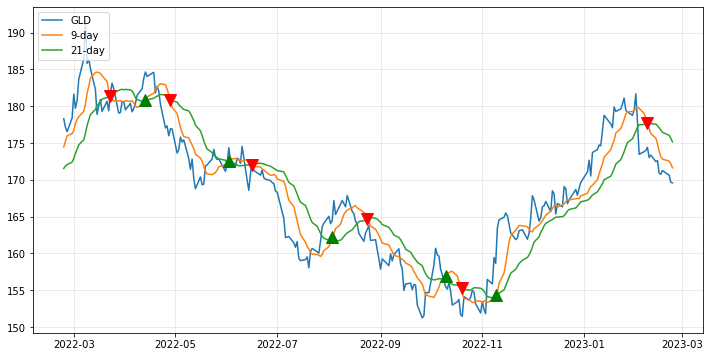

In [33]:
plt.rcParams["figure.figsize"] = 12, 6
plt.grid(True,  alpha =.3)
plt.plot(gld.iloc[-252:]["Close"], label = "GLD")
plt.plot(gld.iloc[-252:]["9-day"], label = "9-day")
plt.plot(gld.iloc[-252:]["21-day"], label = "21-day")
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]["9-day"][gld.entry == 2], '^', color ="g", markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]["21-day"][gld.entry == -2], "v", color = "r", markersize = 12)
plt.legend(loc=2);

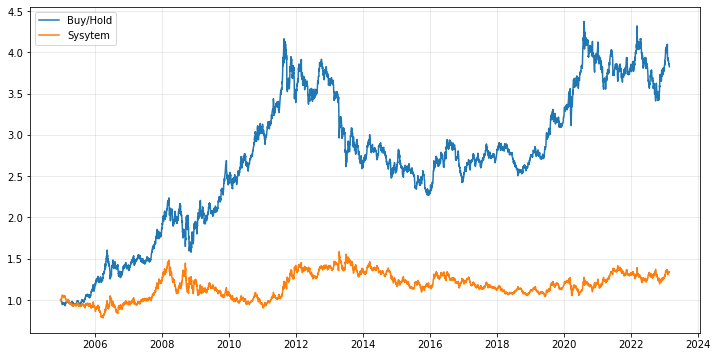

In [35]:
plt.plot(np.exp(gld["return"]).cumprod(), label="Buy/Hold")
plt.plot(np.exp(gld["system_return"]).cumprod(), label="Sysytem")
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [37]:
np.exp(gld["return"]).cumprod()[-1] -1

2.8246505667630095

In [38]:
np.exp(gld["system_return"]).cumprod()[-1] -1

0.3447593460291989